In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


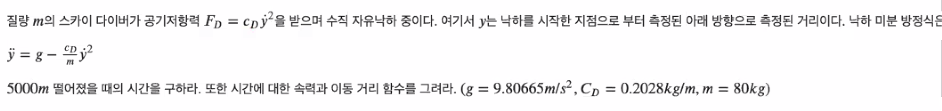

In [8]:
g=9.8
cd=0.2
m=80

def f(t,y):
  y0,y1=y
  f1 =y1
  f2=g-(cd/m)*y1**2
  return [f1,f2]

yini=[0,0]
t_span=[0,100]
sol=solve_ivp(f,t_span,yini)

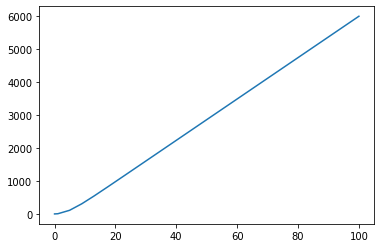

In [9]:
plt.plot(sol.t,sol.y[0])

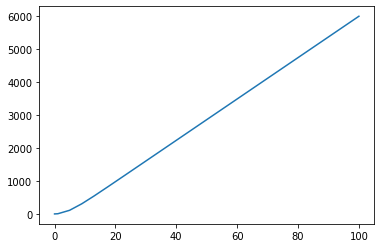

In [10]:
from scipy.interpolate import interp1d
yfun = interp1d(sol.t,sol.y[0])
plt.plot(sol.t,yfun(sol.t))

In [12]:
yfun = interp1d(sol.t,sol.y[0])
def yfe(t): return yfun(t)-5000
from scipy.optimize import root_scalar
root_scalar(yfe,method='brentq',bracket=[60,100])

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 84.2833125694178

In [17]:
def yfev(t,y):
  return y[0]-5000
yini=[0,0]
t_span=[0,100]
sol = solve_ivp(f,t_span,yini,events=yfev, rtol=1e-6, atol=1e-6)

In [18]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 206
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 2.10281656e+00, 3.20244263e+00,
       4.61805869e+00, 5.80801318e+00, 6.99796767e+00, 8.17187636e+00,
       9.36603952e+00, 1.06026484e+01, 1.18992414e+01, 1.32725424e+01,
       1.47401827e+01, 1.63219716e+01, 1.80411946e+01, 1.99262215e+01,
       2.20127170e+01, 2.43468690e+01, 2.69903238e+01, 3.00280607e+01,
       3.35815362e+01, 3.78317503e+01, 4.30619233e+01, 4.97394451e+01,
       5.86561257e+01, 7.08096788e+01, 8.22249415e+01, 9.36402042e+01,
       1.00000000e+02])
 t_events: [array([84.28792453])]
        y: array([[0.00000000e+00, 4.90000000e-08, 5.92899997e-06, 6.03728696e-04,
        6.04786809e-02, 6.01901139e+00, 2.12867317e+01, 4.82792501e+01,
        9.64953579e+01, 1.46546938e+02, 

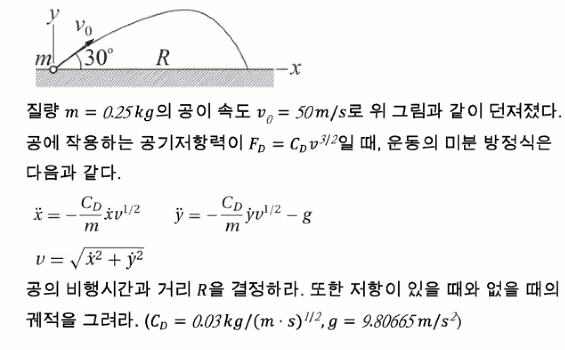

In [ ]:
#x=50 일때 시간을 구하기

In [36]:
g=9.8
cd=0.03
m=0.25

def f(t,y):
  x0,x1,y0,y1=y
  v=np.sqrt(x1**2+y1**2)
  f1 =x1
  f2=-(cd/m)*x1*(v**(1/2))
  f3 = y1
  f4 = -(cd/m)*y1*(v**(1/2))-g
  return [f1,f2,f3,f4]

yini=[0,50*np.cos(np.pi/6),0,50*np.sin(np.pi/6)]
t_span=[0,10]
def yfev(t,y):
  return y[0]-50
sol=solve_ivp(f,t_span,yini,events=yfev,rtol=1e-6, atol=1e-6)

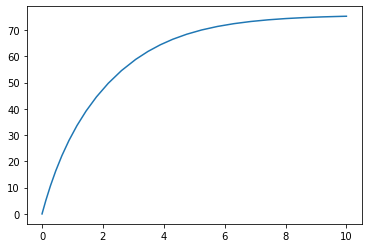

In [37]:
plt.plot(sol.t,sol.y[0])

In [29]:
sol.t_events

[array([2.19819748])]